### 梯度下降法

In [10]:
import numpy as np

class GradientDescent:
    
    def __init__(self, learn_rate, iter_nums):
        self.learn_rate = learn_rate
        self.iter_nums = iter_nums
        self.wight = None
        self.costs = []
    
    def fit(self, X, Y):
        """
            parameters:
            X: np.ndarray, size:[simples,features]
            Y：np.ndarray, size:features
            
            return: self
        """
        simples,features = X.shape

        self.wight = np.random.random((features + 1, 1))
        # 确保为二维列向量
        Y = Y.reshape((simples, 1))
        
        for _ in range(self.iter_nums): 
            predict = self.net_input(X)
            _error = Y - predict
            
            self.wight[1:] += self.learn_rate * np.dot(X.T, _error)
            self.wight[0]  += self.learn_rate * np.sum(_error)
            # cost
            self.costs.append(np.sum(_error ** 2) / 2)
        
        return self
    
    def net_input(self, x):
        """
            parameters:
            x: np.ndarray, size:[simples,features]

            return: np.ndarray, size:[simples,1]
        """
        
        return self.wight[0] + np.dot(x, self.wight[1:,])
    
    def predict(self, x):
        """
            parameters:
            x: n.ndarray, size:[simples,features]
            
            return: np.ndarray, size:[simples,1]
        """
        return np.where(self.net_input(x) > 0, 1, -1)

### 数据读取、处理

In [11]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

Y = df.iloc[0:100,4].values
Y = np.where(Y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100,[0,2]].values

### 训练模型

In [14]:
costs1 = GradientDescent(0.01, 10).fit(X, Y).costs
costs2 = GradientDescent(0.0001, 10).fit(X, Y).costs

### 绘制损耗函数

Text(0.5,1,'learn rate = 0.001')

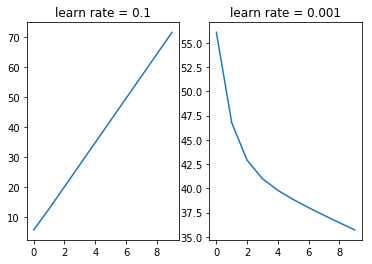

In [23]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2)
axes[0].plot(np.log(costs1))
axes[0].set_title('learn rate = 0.1')
axes[1].plot(costs2)
axes[1].set_title('learn rate = 0.001')

可以从上图看到，当学习速率为0.1时，模型跳过了最优解，当降低学习速率时，误差平方和不断减小，说明不断逼近最优解。  
接下来，我们对数据进行一个“标准化”：
